In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from collections import defaultdict, Counter
from os import listdir
from razdel import tokenize

In [2]:
# !mkdir clean_files
# !mv files/1* clean_files/
# !mv files/2* clean_files/
# !mv files/3* clean_files/

In [3]:
len(listdir('clean_files'))

8109

In [4]:
def parse_hubs(raw_hubs):
    hub_list = [hub_str.strip().lower() for hub_str in raw_hubs.strip().replace(', ', '').split('\n')]
    return [hub for hub in hub_list if hub]

def get_like_value(like_str):
    if len(like_str) == 1:
        return 1 if like_str == '+' else -1
    if like_str[0] != '+':
        return -int(like_str[1:])
    return int(like_str[1:])

In [5]:
count_by_hub = defaultdict(int)
likes = []
hubs_cnt = []
text_lengthes = []

count_good = 0

for filename in tqdm(listdir('clean_files')):
    one_file = pickle.load(open(f'clean_files/{filename}', 'rb'))
    file_hubs = parse_hubs(one_file['hubs'])
    for hub in file_hubs:
        count_by_hub[hub] += 1
    hubs_cnt.append(len(file_hubs))
    text_lengthes.append(len(list(tokenize(one_file["text"]))))
    likes.append(get_like_value(one_file['likes']))

In [6]:
print("Количество текстов:", len(listdir('clean_files')))
print("Средняя длинна текста в токенах:", round(np.mean(text_lengthes), 2))
print()
print("Среднее количество лайков:", np.mean(likes))
print("Медиана лайков:", np.median(likes))
print("Медиана тегов:", np.median(hubs_cnt))

Количество текстов: 8109
Средняя длинна текста в токенах: 1584.8

Среднее количество лайков: 18.8178567024294
Медиана лайков: 13.0
Медиана тегов: 2.0


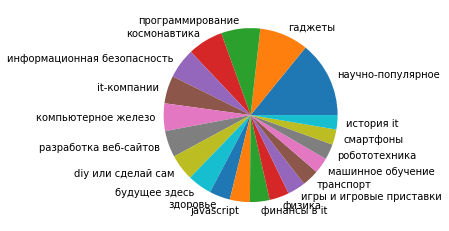

In [7]:
top_categories = sorted([(count, hub) for hub, count in count_by_hub.items()], reverse=True)[:20]

values = [x[0] for x in top_categories]
labels = [x[1] for x in top_categories]

plt.pie(values, labels=labels)
plt.plot()

print()

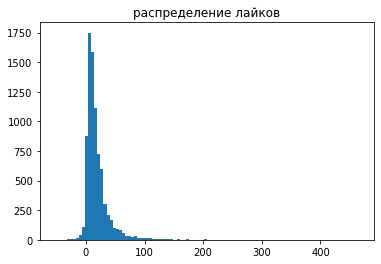

In [8]:
plt.hist(likes, bins=100)
plt.title("распределение лайков")
print()

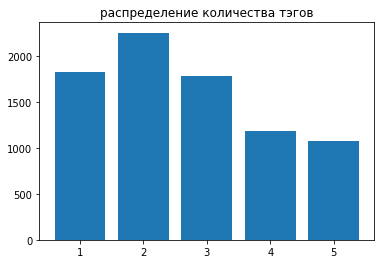

In [9]:
cnt = Counter(hubs_cnt)
hubs_groups = cnt.items()

labels = [x[0] for x in hubs_groups]
values = [x[1] for x in hubs_groups]

plt.bar(labels, values)
plt.title("распределение количества тэгов")
print()